In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Dropout,BatchNormalization
from keras.models import save_model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
val_file = r"C:\Users\aashutosh kumar\Music\sign_mnist_test\sign_mnist_test.csv"
train_file = r"C:\Users\aashutosh kumar\Music\sign_mnist_train\sign_mnist_train.csv"

In [3]:
val_data = pd.read_csv(val_file)
val_data.shape
train_data = pd.read_csv(train_file)
train_data.shape

(27455, 785)

In [4]:
train_data.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163


In [5]:
train_labels = train_data.iloc[:,0].values
train_images = train_data.iloc[:,1:].values

val_labels = val_data.iloc[:,0].values
val_images = val_data.iloc[:,1:].values

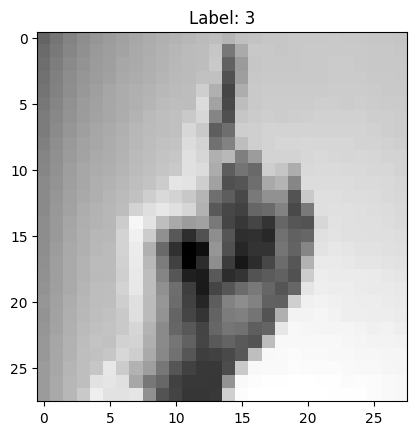

In [6]:
def row_to_image(row):
    return row.reshape(28, 28)

sample_image = row_to_image(train_images[0])
plt.imshow(sample_image,cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.show()

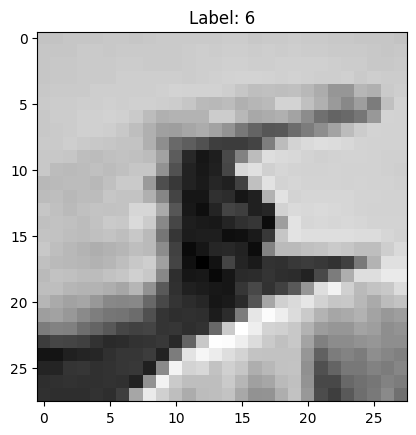

In [7]:
def row_to_image(row):
    return row.reshape(28, 28)

sample_image = row_to_image(val_images[0])
plt.imshow(sample_image,cmap="gray")
plt.title(f"Label: {val_labels[0]}")
plt.show()

In [8]:
num_train_images = len(train_images)
num_val_images = len(val_images)

In [9]:
train_images = train_images.reshape((num_train_images,28,28,1)).astype("float32")/255.0
val_images = val_images.reshape((num_val_images,28,28,1)).astype("float32")/255.0

In [10]:
print(train_images.shape)
print(val_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)

train_generator = datagen.flow(train_images, train_labels, batch_size = 32)
validation_generator = datagen.flow(val_images, val_labels, batch_size = 32)

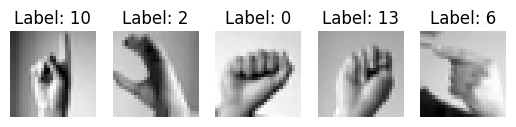

In [13]:
x_batch, y_batch = train_generator.next()
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_batch[i]}")
    plt.axis('off')
plt.show()

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(1024,activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(512,activation = "relu"))
model.add(Dense(26,activation = "softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

In [28]:
history = model.fit(train_generator,validation_data = validation_generator,epochs = 15)

Epoch 1/15
858/858 [==============================] - 25s 19ms/step - loss: 2.0049 - accuracy: 0.3382 - val_loss: 1.1801 - val_accuracy: 0.5849
Epoch 2/15
858/858 [==============================] - 16s 19ms/step - loss: 0.7939 - accuracy: 0.7189 - val_loss: 0.7094 - val_accuracy: 0.7437
Epoch 3/15
858/858 [==============================] - 16s 19ms/step - loss: 0.4601 - accuracy: 0.8391 - val_loss: 0.5140 - val_accuracy: 0.8272
Epoch 4/15
858/858 [==============================] - 16s 19ms/step - loss: 0.3174 - accuracy: 0.8877 - val_loss: 0.3427 - val_accuracy: 0.8811
Epoch 5/15
858/858 [==============================] - 16s 18ms/step - loss: 0.2443 - accuracy: 0.9160 - val_loss: 0.3703 - val_accuracy: 0.8728
Epoch 6/15
858/858 [==============================] - 16s 19ms/step - loss: 0.2112 - accuracy: 0.9279 - val_loss: 0.2529 - val_accuracy: 0.9159
Epoch 7/15
858/858 [==============================] - 16s 18ms/step - loss: 0.1712 - accuracy: 0.9407 - val_loss: 0.2656 - val_accuracy:

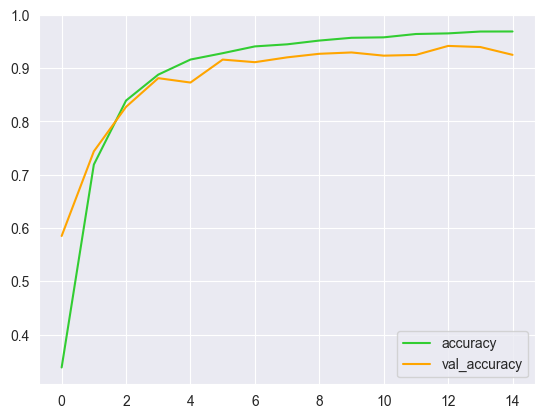

In [31]:
sns.set_style("darkgrid")
plt.plot(history.history["accuracy"],color = "limegreen")
plt.plot(history.history["val_accuracy"],color = "orange")
plt.legend(["accuracy","val_accuracy"])

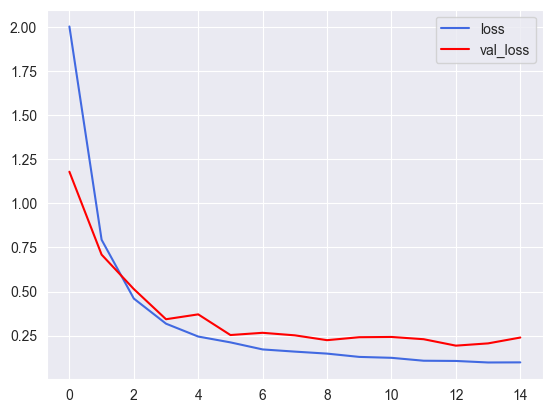

In [32]:
sns.set_style("darkgrid")
plt.plot(history.history["loss"],color = "royalblue")
plt.plot(history.history["val_loss"],color = "red")
plt.legend(["loss","val_loss"])

In [33]:
model.save("Sign_Lang.h5")

In [50]:
classes = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F",
    6: "G", 7: "H", 8: "I", 9: "J", 10: "K", 11: "L",
    12: "M", 13: "N", 14: "O", 15: "P", 16: "Q", 17: "R",
    18: "S", 19: "T", 20: "U", 21: "V", 22: "W", 23: "X",
    24: "Y", 25: "Z"
}

In [54]:
def prediction(path):
    img = cv2.imread(path)
    img  = cv2.resize(img,(28,28))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    img_input = img.reshape(1, 28, 28, 1)
    result = model.predict(img_input)
    predicted_class = np.argmax(result, axis=-1)[0]
    print("The predicted Letter is: ",classes[predicted_class])

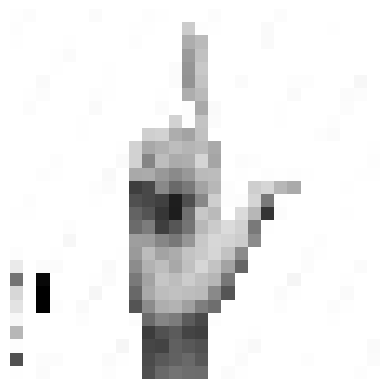

1/1 [==============================] - 0s 17ms/step
The predicted Letter is:  L


In [55]:
prediction(r"C:\Users\aashutosh kumar\Downloads\L.jpg")

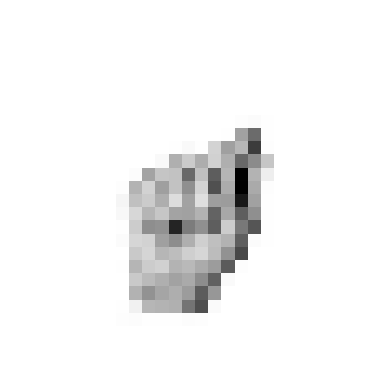

1/1 [==============================] - 0s 15ms/step
The predicted Letter is:  K
None


In [56]:
result = prediction(r"C:\Users\aashutosh kumar\Downloads\A.jpeg")
print(result)